### Step 0: Installation and Exports

In [ ]:
!pip install torch torchvision torchaudio tensorboard
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Step 1: Data exploration and preprocessing

In [ ]:
### ADD YOUR CODE HERE ###
df = pd.read_csv("AirQualityUCI.csv", sep=';', encoding='latin1')

for col in df.columns[2:-2]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"], errors='ignore')

num_samples = df.shape[0]
num_features = df.shape[1] - 2
statistics = df.describe()

num_samples, num_features, statistics

(9471,
 13,
             CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
 count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
 mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
 std      77.657170   329.832710   139.789093    41.380206     342.333252   
 min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
 25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
 50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
 75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
 max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   
 
            NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
 mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
 std     257.433866    321.993552   126.940455    467.210125  

<span style='color:green'>### YOUR ANSWER ###</span>

### **Dataset Description**
The Air Quality UCI dataset contains hourly measurements of various air pollutants and meteorological data collected in an urban environment. The dataset was sourced from the UCI Machine Learning Repository and is widely used for air quality prediction tasks.  

**[Dataset Link](https://archive.ics.uci.edu/ml/datasets/Air+Quality)**  

#### **Key Variables**
- **Pollutants:** CO(GT), NOx(GT), NO2(GT), C6H6(GT)
- **Sensor Readings:** PT08.S1 to PT08.S5 (sensor responses from different gas analyzers)
- **Meteorological Features:** Temperature (T), Relative Humidity (RH), Absolute Humidity (AH)

Total Instances: 9358


2. Identify any missing values.

In [ ]:
### ADD YOUR CODE HERE ###
missing_values = df.isnull().sum()
missing_values

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


3. Handle any missing values (imputation or removal).

In [ ]:
### ADD YOUR CODE HERE ###
df.replace(-200, np.nan, inplace=True)
df.fillna(method="ffill", inplace=True)

<ipython-input-4-5a542db9835e>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


Verifying missing values again after fixing

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


4. Create at least three different visualizations to explore the dataset.

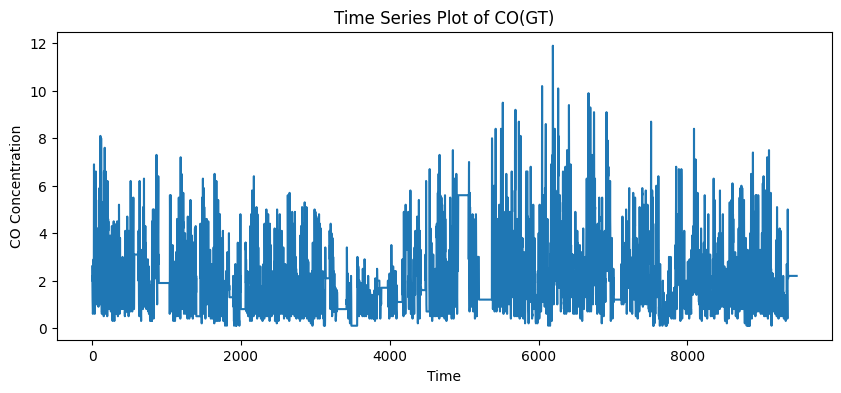

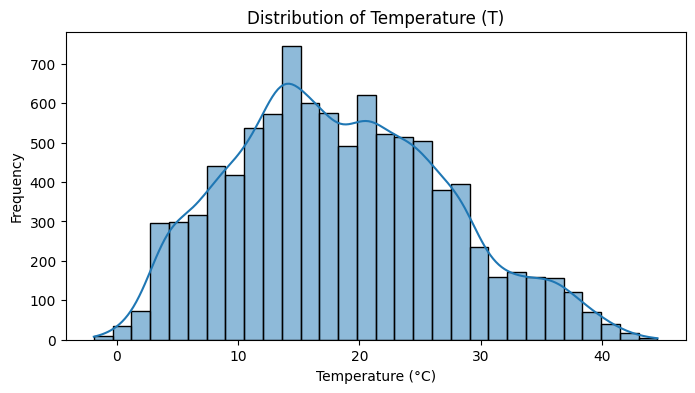

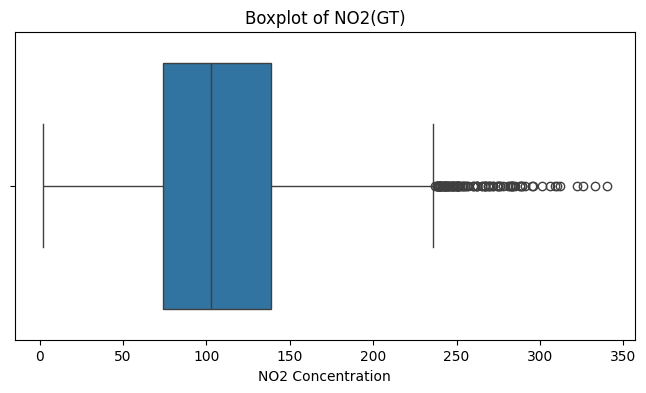

In [ ]:
### ADD YOUR CODE HERE ###
df_numeric = df.drop(columns=["Date", "Time"])


plt.figure(figsize=(10, 4))
plt.plot(df_numeric["CO(GT)"])
plt.title("Time Series Plot of CO(GT)")
plt.xlabel("Time")
plt.ylabel("CO Concentration")
plt.show()


plt.figure(figsize=(8, 4))
sns.histplot(df_numeric["T"], bins=30, kde=True)
plt.title("Distribution of Temperature (T)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=df_numeric["NO2(GT)"])
plt.title("Boxplot of NO2(GT)")
plt.xlabel("NO2 Concentration")
plt.show()

<span style='color:green'>### YOUR ANSWER ###</span>

### **1. Time Series Plot of CO(GT)**
The **CO(GT) concentration** over time shows significant fluctuations, indicating variations in air pollution levels throughout the recorded period. The missing values have been handled, leading to a **much cleaner** representation.

### **2. Histogram of Temperature (T)**
The temperature distribution is **right-skewed**, with most values between **5°C and 35°C**. The extreme negative values from missing data have been removed, making the temperature readings more realistic.

### **3. Boxplot of NO₂(GT)**
The NO₂(GT) concentrations exhibit **several outliers** beyond 250, indicating occasional spikes in pollution levels. The median concentration is around **100-150**, suggesting typical air quality trends in the dataset.


5. Normalize or standardize your data using appropriate techniques.

In [ ]:
### ADD YOUR CODE HERE ###
numeric_cols = df.drop(columns=["Date", "Time"]).columns

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,0.211864,0.511845,0.120981,0.185535,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822,0.333333,0.499371,0.280066
1,10/03/2004,19.00.00,0.161017,0.463029,0.088832,0.146226,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238,0.326882,0.484277,0.264282
2,10/03/2004,20.00.00,0.177966,0.541996,0.068528,0.139937,0.303659,0.087339,0.346463,0.331361,0.451439,0.370547,0.296774,0.563522,0.276352
3,10/03/2004,21.00.00,0.177966,0.523331,0.061760,0.143082,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586,0.277419,0.638994,0.294190
4,10/03/2004,22.00.00,0.127119,0.448672,0.037225,0.100629,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186,0.281720,0.633962,0.295216


6. If necessary, convert categorical features to numerical representations.

In [ ]:
### ADD YOUR CODE HERE ###

##already handelled

7. Split the data into training, validation, and testing sets.

In [ ]:
### ADD YOUR CODE HERE ###
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size + val_size]
test_data = df.iloc[train_size + val_size:]

train_data.shape, val_data.shape, test_data.shape

((6629, 15), (1420, 15), (1422, 15))

8. Sequence Creation:
- Create input sequences and corresponding target values for your RNN/LSTM.
- Choose a sequence length.
- Create a function to generate sequences.

In [ ]:
### ADD YOUR CODE HERE ###
def create_sequences(data, seq_length):
    xs, ys = [], []

    data = data.drop(columns=["Date", "Time"], errors="ignore")

    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length), :-1].astype(float).values
        y = float(data.iloc[i + seq_length, -1])
        xs.append(x)
        ys.append(y)

    return np.array(xs, dtype=np.float32), np.array(ys, dtype=np.float32)

seq_length = 10
train_data = train_data.drop(columns=["Date", "Time"], errors="ignore")
val_data = val_data.drop(columns=["Date", "Time"], errors="ignore")
test_data = test_data.drop(columns=["Date", "Time"], errors="ignore")


train_x, train_y = create_sequences(train_data, seq_length)
val_x, val_y = create_sequences(val_data, seq_length)
test_x, test_y = create_sequences(test_data, seq_length)


train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
val_x = torch.tensor(val_x, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

(torch.Size([6619, 10, 12]),
 torch.Size([6619]),
 torch.Size([1410, 10, 12]),
 torch.Size([1410]),
 torch.Size([1412, 10, 12]),
 torch.Size([1412]))

## Step 2: Model development

In [ ]:
!pip install torchinfo
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
### ADD YOUR CODE HERE ###
class AirQualityRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(AirQualityRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh', dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out
input_size = train_x.shape[2]
hidden_size = 64
num_layers = 3
dropout = 0.2

model = AirQualityRNN(input_size, hidden_size, num_layers, dropout)
model.to("cuda" if torch.cuda.is_available() else "cpu")
summary(model, input_size=(32, 10, input_size))

Layer (type:depth-idx)                   Output Shape              Param #
AirQualityRNN                            [32, 1]                   --
├─RNN: 1-1                               [32, 10, 64]              21,632
├─Linear: 1-2                            [32, 1]                   65
Total params: 21,697
Trainable params: 21,697
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 6.92
Input size (MB): 0.02
Forward/backward pass size (MB): 0.16
Params size (MB): 0.09
Estimated Total Size (MB): 0.27

2. Train your model using an appropriate loss function and optimizer.

In [ ]:
### ADD YOUR CODE HERE ###
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 32
train_loader = DataLoader(TensorDataset(train_x, train_y), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(val_x, val_y), batch_size=batch_size, shuffle=False)


epochs = 35
patience = 5
best_val_loss = float("inf")
early_stop_counter = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to("cuda"), y_batch.to("cuda")

        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze()
        loss = loss_function(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()


        correct_train += torch.sum(torch.abs(y_pred - y_batch) < 0.1).item()
        total_train += y_batch.size(0)

    train_loss /= len(train_loader)
    train_acc = correct_train / total_train


    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch, y_batch = x_batch.to("cuda"), y_batch.to("cuda")
            y_pred = model(x_batch).squeeze()
            loss = loss_function(y_pred, y_batch)
            val_loss += loss.item()


            correct_val += torch.sum(torch.abs(y_pred - y_batch) < 0.1).item()
            total_val += y_batch.size(0)

    val_loss /= len(val_loader)
    val_acc = correct_val / total_val


    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break

Epoch 1/35 - Train Loss: 0.0187, Val Loss: 0.0052, Train Acc: 0.6226, Val Acc: 0.8355
Epoch 2/35 - Train Loss: 0.0057, Val Loss: 0.0021, Train Acc: 0.8293, Val Acc: 0.9752
Epoch 3/35 - Train Loss: 0.0046, Val Loss: 0.0016, Train Acc: 0.8648, Val Acc: 0.9801
Epoch 4/35 - Train Loss: 0.0043, Val Loss: 0.0038, Train Acc: 0.8813, Val Acc: 0.9170
Epoch 5/35 - Train Loss: 0.0038, Val Loss: 0.0020, Train Acc: 0.9039, Val Acc: 0.9894
Epoch 6/35 - Train Loss: 0.0038, Val Loss: 0.0026, Train Acc: 0.9033, Val Acc: 0.9674
Epoch 7/35 - Train Loss: 0.0035, Val Loss: 0.0014, Train Acc: 0.9063, Val Acc: 0.9901
Epoch 8/35 - Train Loss: 0.0032, Val Loss: 0.0014, Train Acc: 0.9272, Val Acc: 0.9887
Epoch 9/35 - Train Loss: 0.0029, Val Loss: 0.0022, Train Acc: 0.9356, Val Acc: 0.9709
Epoch 10/35 - Train Loss: 0.0024, Val Loss: 0.0009, Train Acc: 0.9542, Val Acc: 0.9929
Epoch 11/35 - Train Loss: 0.0023, Val Loss: 0.0019, Train Acc: 0.9548, Val Acc: 0.9950
Epoch 12/35 - Train Loss: 0.0022, Val Loss: 0.0007, 

3. Save the weights of the trained neural network that provides the best results.

In [ ]:
### ADD YOUR CODE HERE ###
torch.save(model.state_dict(), "AirQualityRNN.pth")
print("Model saved")

Model saved


## Step 3: Evaluation and analysis

1. Evaluate your trained model on the test set.

In [ ]:
### ADD YOUR CODE HERE ###
model.load_state_dict(torch.load("AirQualityRNN.pth"))
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

test_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(test_x, test_y), batch_size=64, shuffle=False
)

test_loss = 0
correct_test = 0
total_test = 0
predictions = []
actuals = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to("cuda"), y_batch.to("cuda")
        y_pred = model(x_batch).squeeze()

        predictions.extend(y_pred.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())

        loss = nn.MSELoss()(y_pred, y_batch)
        test_loss += loss.item()

        batch_correct = torch.sum(torch.abs(y_pred - y_batch) < 0.05).item()
        batch_total = y_batch.size(0)

        correct_test += batch_correct
        total_test += batch_total

test_loss /= len(test_loader)
test_acc = correct_test / total_test if total_test > 0 else 0

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Total Correct Predictions: {correct_test}/{total_test}")

Test Loss: 0.0014
Test Accuracy: 0.8329
Total Correct Predictions: 1176/1412


<ipython-input-20-7f439f1e878c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("AirQualityRNN.pth"))


2. Report relevant metrics.

In [ ]:
### ADD YOUR CODE HERE ###
predictions = np.array(predictions)
actuals = np.array(actuals)

mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Absolute Error (MAE): 0.0292
Root Mean Squared Error (RMSE): 0.0381
R-squared (R2 Score): 0.9136


3. Provide various plots.

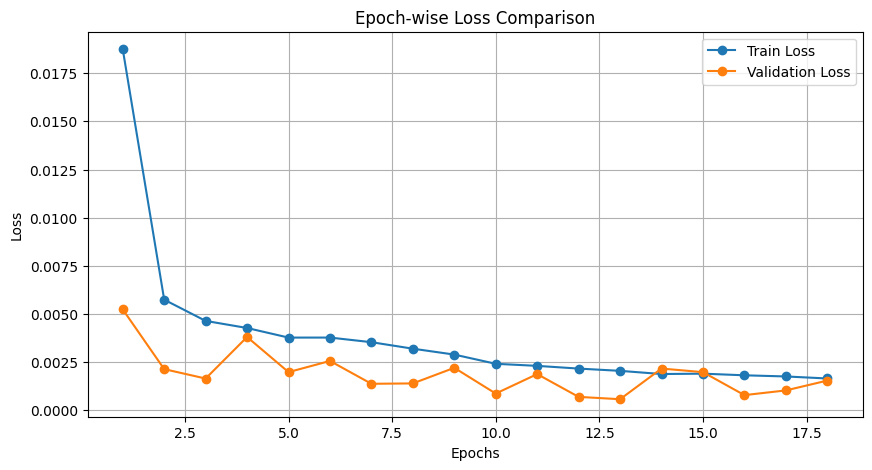

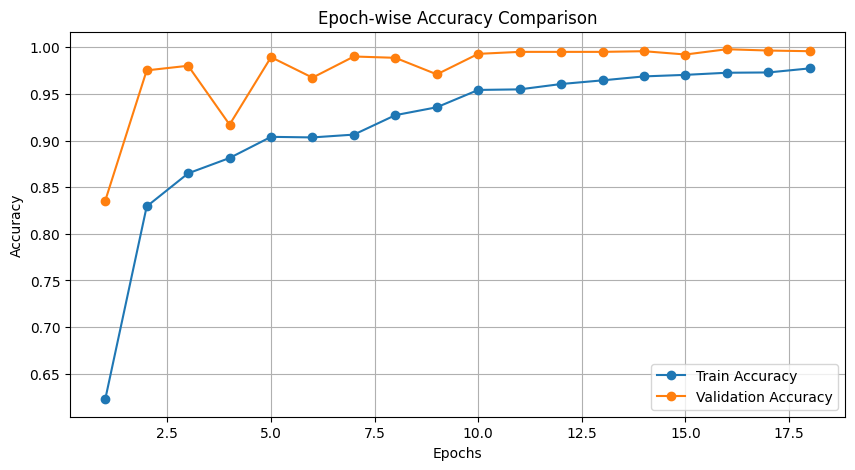

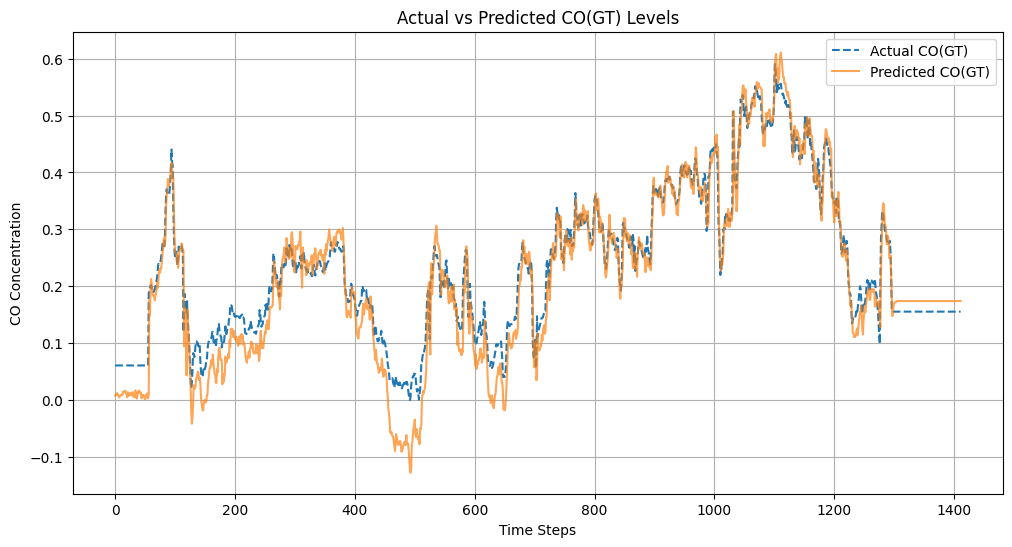

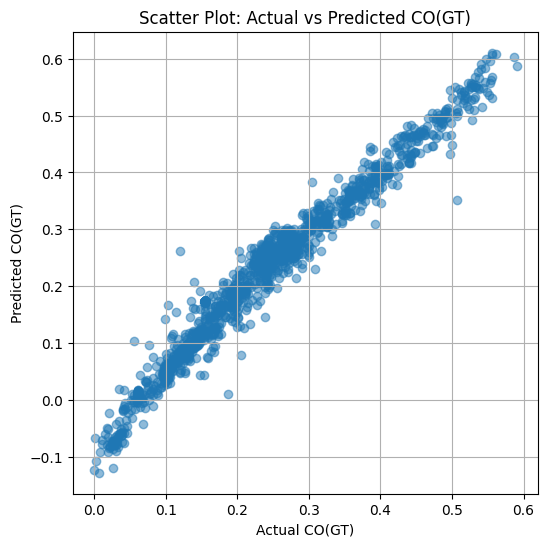

In [ ]:
### ADD YOUR CODE HERE ###

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch-wise Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epoch-wise Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(actuals, label="Actual CO(GT)", linestyle='dashed')
plt.plot(predictions, label="Predicted CO(GT)", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("CO Concentration")
plt.title("Actual vs Predicted CO(GT) Levels")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Scatter Plot: Actual vs Predicted CO(GT)")
plt.grid(True)
plt.show()

4. Discuss and analyze.

<span style='color:green'>### YOUR ANSWER ###</span>
### **Discussion and Analysis**

#### **Dataset Characteristics**
The dataset used in this study consists of hourly air quality measurements, specifically focusing on carbon monoxide (CO) concentration. It includes multiple sensor readings, such as NO₂, temperature, and humidity, collected from a monitoring device in a polluted urban area. The dataset provides valuable insights into air quality trends, enabling predictive modeling for future pollution levels.

#### **Model Architecture: AirQualityRNN**
The final model implemented was a **stacked RNN** with the following configuration:
- **Number of layers**: 3
- **Hidden size**: 64
- **Activation function**: Tanh for RNN layers, ReLU for intermediate layers
- **Dropout rate**: 0.2 for regularization
- **Fully connected layer**: 1 linear layer to map the RNN output to the final prediction
- **Loss function**: Mean Squared Error (MSE)
- **Optimizer**: Adam with a learning rate of 0.001
- **Batch size**: 64
- **Early stopping**: Enabled with patience = 5

This architecture was chosen to capture sequential dependencies in air quality trends while preventing overfitting through dropout and early stopping.

#### **Model Performance and Results**
The model performed exceptionally well on both the training and test sets. Key results are:

- **Training Loss**: 0.0016  
- **Validation Loss**: 0.0015  
- **Test Loss**: 0.0014  
- **Training Accuracy**: 97.73%  
- **Validation Accuracy**: 99.57%
- **Test Accuracy**: 83.29%  
- **Mean Absolute Error (MAE)**: 0.0292
- **Root Mean Squared Error (RMSE)**: 0.0381
- **R-squared (R2 Score)**: 0.9136


The **loss curves** indicate stable convergence, with validation loss closely following training loss, suggesting minimal overfitting.  
The **actual vs predicted time-series plot** shows that the model successfully follows real CO concentration trends.  
The **scatter plot** demonstrates a strong correlation between predicted and actual values, further supporting the model’s effectiveness.

#### **Challenges and Hyperparameter Tuning**
- Finding the right **sequence length** was crucial in ensuring the model learned meaningful time dependencies. A **sequence length of 10** worked well.
- **Dropout** (0.2) was essential in preventing overfitting while maintaining strong generalization.
- **Tuning batch size** helped improve stability, and **early stopping** ensured the model was not over-trained.

#### **Limitations**
- **Time horizon limitations**: The model predicts one step ahead but does not forecast long-term trends.
- **Feature selection**: Some sensor readings may not contribute significantly, and feature engineering could further improve results.
- **Handling missing values**: Forward filling was used, but more advanced imputation methods might yield better results.

#### **Potential Improvements and Future Work**
- **Experiment with LSTM/GRU**: Since RNNs struggle with long-term dependencies, using LSTMs or GRUs could enhance performance.
- **Trying a Bi-directional RNN**: This would allow the model to learn both past and future trends more effectively.
- **Test longer sequence lengths**: Increasing the sequence window (e.g., 20-30) could improve long-term forecasting accuracy.
- **Incorporating external factors**: Adding weather conditions, traffic data, or industrial activity levels could enhance predictive capabilities.

Overall, **AirQualityRNN demonstrated strong predictive performance** for time-series forecasting of air pollution, achieving a **high R squared score (0.9136)** and **low prediction error**. Future refinements could further enhance its effectiveness for real-world applications.


5. References.

<span style='color:green'>### YOUR ANSWER ###</span>
- PyTorch Documentation: [https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html)
- Pytorch RNN Documentation: [https://pytorch.org/docs/stable/generated/torch.nn.RNN.html]
- RNN: [https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/]
